### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.model_selection as sms
import sklearn.preprocessing as sp
import sklearn.linear_model as slm
import sklearn.metrics as sm
import sklearn.ensemble as ens
from warnings import filterwarnings 
filterwarnings('ignore') # to ignore warnings
import sklearn.linear_model as slm

### Loading data

In [2]:
# retrieving data
#df=pd.read_csv("D:\Data\Gamboo\Customers\Customers.txt")
df=pd.read_csv("Customers.txt")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### EDA, Preprocessing

To check the general form of columns which may need some **cleaning operations like handling null(missing values), converting datatype, and others**.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [9]:
df[df.duplicated(['Email'])]
# No Duplicate

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


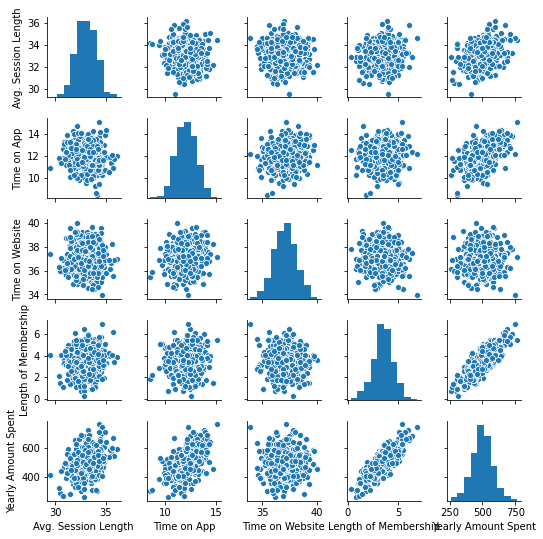

In [54]:
sns.pairplot(df, size=1.5)
plt.show()
# as we we see, "Length of Membership" and "Time on the app" are more linear affecter on "Yeraly Amount Spend"

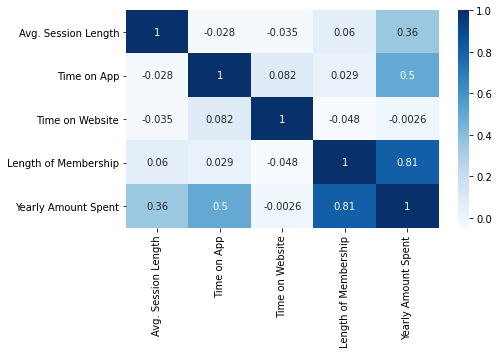

In [58]:
plt.figure(figsize=(7, 4))
sns.heatmap(df.corr(), cmap="Blues", annot=True)
plt.show()

#### Splitting data

In [10]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [13]:
X = df.drop(columns=['Email', 'Address', 'Avatar', 'Yearly Amount Spent'])
y = df[['Yearly Amount Spent']]

In [14]:
train_X, test_X, train_y, test_y = sms.train_test_split(X, y, test_size=0.2, random_state=25)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(400, 4) (100, 4) (400, 1) (100, 1)


#### Data Normalization(Scaling)

**RobustScaler** is one of the preferred scalers mainly to **avoid outliers impact** if there is a chance of being

In [15]:
scaler_rb=sp.RobustScaler()
scaled_tra=scaler_rb.fit_transform(train_X)

In [16]:
names = list(train_X.columns)
train_X=pd.DataFrame(scaled_tra, columns=names)
train_X.head(3)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,0.506484,-0.017051,0.727851,0.460977
1,0.013120,-0.098208,-0.169799,0.061215
2,0.902256,-0.200588,-0.190778,-0.079382


In [17]:
scaled_test=scaler_rb.transform(test_X)
test_X=pd.DataFrame(data=scaled_test, columns=names)
test_X.head(3)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,-0.063945,0.764874,-0.064344,0.919525
1,0.217344,0.601284,-1.117990,-0.265295
2,-0.237834,-1.480271,0.231909,0.945129


In [18]:
# to merge all scores and metrics results altogether
performance=pd.DataFrame(data=None, index=['MAE','RMSE','R2_score'])
performance

""
MAE
RMSE
R2_score


In [19]:
# creating function to evaluate model at one run
def evaluate(model,model_name):
    performance[model_name]=[sm.mean_absolute_error(test_y, model.predict(test_X)),
    sm.mean_squared_error(test_y, model.predict(test_X))**0.5,
    sm.r2_score(test_y, model.predict(test_X)) ]
pd.options.display.float_format = '{:.3f}'.format

### Modelling

#### Multiple linear regression model

In [20]:
lm=slm.LinearRegression()
lm.fit(train_X, train_y)
evaluate(lm, 'MLinear')
performance[['MLinear']]

,MLinear
MAE,8.230
RMSE,10.147
R2_score,0.982


We will do **Hyperparameter tuning** to find **otimal best** parameters in some models

#### RandomForest regression model

In [21]:
parameters = { 'n_estimators':[i for i in range(150,200,10)] }
rfr = ens.RandomForestRegressor(random_state=25)
clf3 = sms.GridSearchCV(rfr, parameters)
clf3.fit(train_X, train_y)

clf3.best_params_

{'n_estimators': 180}

In [22]:
evaluate(clf3, 'R_forest')
performance[['R_forest']]

,R_forest
MAE,12.078
RMSE,16.600
R2_score,0.952


##### ExtraTree regression model

In [23]:
parameters = { 'n_estimators':[i for i in range(80,200,10)] }
etr = ens.ExtraTreesRegressor(random_state=25)
clf4 = sms.GridSearchCV(etr, parameters)
clf4.fit(train_X, train_y)

clf4.best_params_

{'n_estimators': 170}

In [24]:
evaluate(clf4, 'ExTree')
performance[['ExTree']]

,ExTree
MAE,10.684
RMSE,13.754
R2_score,0.967


#### GradientBoosting regression model

In [25]:
parameters = { 'learning_rate':[0.1,0.01,0.001], 'n_estimators':[50,100,150,200,250] }
gbr = ens.GradientBoostingRegressor(random_state=25)
clf5 = sms.GridSearchCV(gbr, parameters)
clf5.fit(train_X, train_y)

clf5.best_params_

{'learning_rate': 0.1, 'n_estimators': 250}

In [26]:
evaluate(clf5, 'GradientBR')
performance[['GradientBR']]

,GradientBR
MAE,12.050
RMSE,14.939
R2_score,0.961


In [27]:
performance

,MLinear,R_forest,ExTree,GradientBR
MAE,8.230,12.078,10.684,12.050
RMSE,10.147,16.600,13.754,14.939
R2_score,0.982,0.952,0.967,0.961


According to the comparison of models performances, the **Multiple Linear Regression** is the optimal(best for now) model to pick and to utilize as the major

## Answer to targeted question

In [60]:
pd.DataFrame(lm.coef_.reshape(4, 1), columns = ['Coefficient'], index = train_X.columns).sort_values('Coefficient', 
                                                                                                     ascending=False)

,Coefficient
Length of Membership,71.574
Time on App,53.134
Avg. Session Length,36.226
Time on Website,0.369


As can be seen on the **Coefficient** list, **Influence Power** of features are getting decreased from the top which is **"Length of membership"** to "Time on Website". Hence, we should focus more on variables as ranked above. For instance, if we increase one unit while keeping fixed else, **"Yearly Amount Spent"** is increased **71.57**. When came to the question, **"Time on App"** is **more necessary** in order to use effort rather than *"Time on Website"*thers**.

**Thanks**